$$
\def\CC{\bf C}
\def\QQ{\bf Q}
\def\RR{\bf R}
\def\ZZ{\bf Z}
\def\NN{\bf N}
$$
# Color

Authors  
Daniel Shiffman; Abhik Pal (p5 port); Daniel Berio (Py5Canvas/notebook port)

Copyright  
This tutorial is from the book [Learning
Processing](https://processing.org/books/#shiffman) by Daniel Shiffman,
published by Morgan Kaufmann, © 2008 Elsevier Inc. All rights reserved.
The tutorial was initially ported to [p5](https://github.com/p5py/p5/)/Python by Abhik Pal.. This is an adaptation of the port to Jupyter notebooks made by Daniel Berio with [py5canvas](http://github.com/colormotor/py5canvas).

In the digital world, when we want to talk about a color, precision is
required. Saying "Hey, can you make that circle bluish-green?" will not
do. Color, rather, is defined as a range of numbers. Let's start with
the simplest case: black & white or grayscale. 0 means black, 255 means
white. In between, every other number -- 50, 87, 162, 209, and so on --
is a shade of gray ranging from black to white.
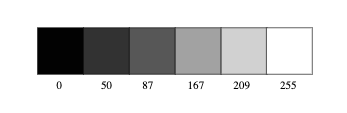


> Note

>> *Does 0-255 seem arbitrary to you?*

>> Color for a given shape needs to be stored in the computer's memory.
This memory is just a long sequence of 0's and 1's (a whole bunch of on
or off switches.) Each one of these switches is a bit, eight of them
together is a byte. Imagine if we had eight bits (one byte) in sequence
-- how many ways can we configure these switches? The answer is (and
doing a little [research into binary
numbers](http://en.wikipedia.org/wiki/Binary_number) will prove this
point) 256 possibilities, or a range of numbers between 0 and 255. We
will use eight bit color for our grayscale range and 24 bit for full
color (eight bits for each of the red, green, and blue color
components).

By adding the `stroke` and `fill` functions before something is
drawn, we can set the color of any given shape. There is also the
function `background` which sets a background color for the window.
Here's an example:

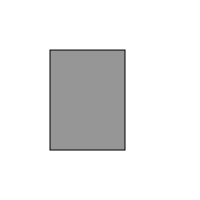

In [3]:
from py5canvas import *

size(200, 200)
background(255)
stroke(0)
fill(150)
rect((50, 50), 75, 100)

show()

Stroke or fill can be eliminated with the functions: `no_stroke` and
`no_fill`. Our instinct might be to say `stroke(0)` for no outline,
however, it is important to remember that 0 is not "nothing", but rather
denotes the color black. Also, remember not to eliminate both -- with
`no_stroke` and `no_fill`, nothing will appear!

In addition, if we draw two shapes, p5 will always use the most recently
specified stroke and fill, reading the code from top to bottom.

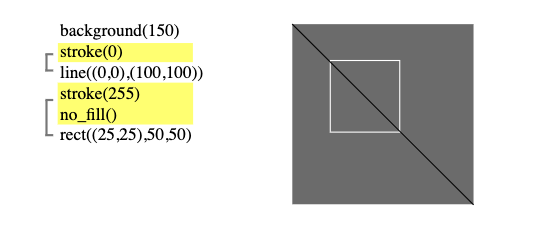

## RGB Color

Remember finger painting? By mixing three "primary" colors, any color
could be generated. Swirling all colors together resulted in a muddy
brown. The more paint you added, the darker it got. Digital colors are
also constructed by mixing three primary colors, but it works
differently from paint. First, the primaries are diff erent: red, green,
and blue (i.e., "RGB" color). And with color on the screen, you are
mixing light, not paint, so the mixing rules are different as well.

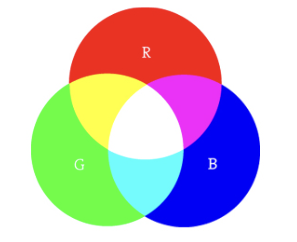

-   Red + Green = Yellow
-   Red + Blue = Purple
-   Green + Blue = Cyan (blue-green)
-   Red + Green + Blue = White
-   No colors = Black

This assumes that the colors are all as bright as possible, but of
course, you have a range of color available, so some red plus some green
plus some blue equals gray, and a bit of red plus a bit of blue equals
dark purple. While this may take some getting used to, the more you
program and experiment with RGB color, the more it will become
instinctive, much like swirling colors with your fi ngers. And of course
you can't say "Mix some red with a bit of blue," you have to provide an
exact amount. As with grayscale, the individual color elements are
expressed as ranges from 0 (none of that color) to 255 (as much as
possible), and they are listed in the order R, G, and B. You will get
the hang of RGB color mixing through experimentation, but next we will
cover some code using some common colors.


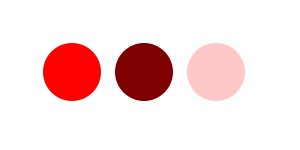

In [8]:
from py5canvas import *

size(300, 150)
background(255)
no_stroke()

# bright red
fill(255, 0, 0)
circle((72, 72), 58)

# dark red
fill(127, 0, 0)
circle((144, 72), 58)

# Pink (pale red)
fill(255, 200, 200)
circle((216, 72), 58)

show()

## Color Transparency

In addition to the red, green, and blue components of each color, there
is an additional optional fourth component, referred to as the color's
"alpha." Alpha means transparency and is particularly useful when you
want to draw elements that appear partially see-through on top of one
another. The alpha values for an image are sometimes referred to
collectively as the "alpha channel" of an image.

It is important to realize that pixels are not literally transparent,
this is simply a convenient illusion that is accomplished by blending
colors. Behind the scenes, Processing takes the color numbers and adds a
percentage of one to a percentage of another, creating the optical
perception of blending. (If you are interested in programming
"rose-colored" glasses, this is where you would begin.)

Alpha values also range from 0 to 255, with 0 being completely
transparent (i.e., 0% opaque) and 255 completely opaque (i.e., 100%
opaque).

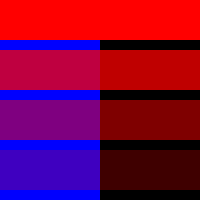

In [9]:
from py5canvas import *

size(200, 200)
no_stroke()

background(0)

# No fourth argument means 100% opacity.
fill(0, 0, 255)
rect((0, 0), 100, 200)

# 255 means 100% opacity.
fill(255, 0, 0, 255)
rect((0, 0), 200, 40)

# 75% opacity.
fill(255, 0, 0, 191)
rect((0, 50), 200, 40)

# 55% opacity.
fill(255, 0, 0, 127)
rect((0, 100), 200, 40)

# 25% opacity.
fill(255, 0, 0, 63)
rect((0, 150), 200, 40)

show()

## Custom Color Ranges

RGB color with ranges of 0 to 255 is not the only way you can handle
color in Processing. Behind the scenes in the computer's memory, color
is always talked about as a series of 24 bits (or 32 in the case of
colors with an alpha). However, Processing will let us think about color
any way we like, and translate our values into numbers the computer
understands. For example, you might prefer to think of color as ranging
from 0 to 100 (like a percentage). You can do this by specifying a
custom `p5.color_mode`.

In [10]:
color_mode('RGB', 100)

The above function says: "OK, we want to think about color in terms of
red, green, and blue. The range of RGB values will be from 0 to 100."

Although it is rarely convenient to do so, you can also have different
ranges for each color component:

In [11]:
color_mode('RGB', 100, 500, 10, 255)

Now we are saying "Red values go from 0 to 100, green from 0 to 500,
blue from 0 to 10, and alpha from 0 to 255."

Finally, while you will likely only need RGB color for all of your
programming needs, you can also specify colors in the HSB (hue,
saturation, and brightness) mode. Without getting into too much detail,
HSB color works as follows:

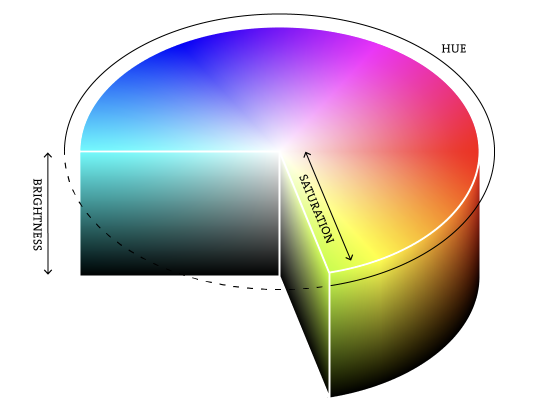

-   **Hue** --The color type, ranges from 0 to 255 by default.
-   **Saturation** -- The vibrancy of the color, 0 to 255 by default.
-   **Brightness** -- The, well, brightness of the color, 0 to 255 by
    default.

With `color_mode` you can set your own ranges for these values. Some
prefer a range of 0-360 for hue (think of 360 degrees on a color wheel)
and 0-100 for saturation and brightness (think of 0-100%).